<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Linear%20Regression/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch (No ML Libraries)

In this notebook, we will:
- Understand the theory behind Linear Regression
- Implement it from scratch using only NumPy
- Train on synthetic data
- Visualize results and loss

## 1. What is Linear Regression?

Linear regression is a supervised learning algorithm used to predict a continuous output variable based on one or more input features.

**Goal**: Learn the best-fitting line `y = wx + b` that minimizes the difference between actual and predicted values.

We use **Mean Squared Error (MSE)** as the loss function:


$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


We minimize the loss using **Gradient Descent**.

## 2. Imports & Data Generation


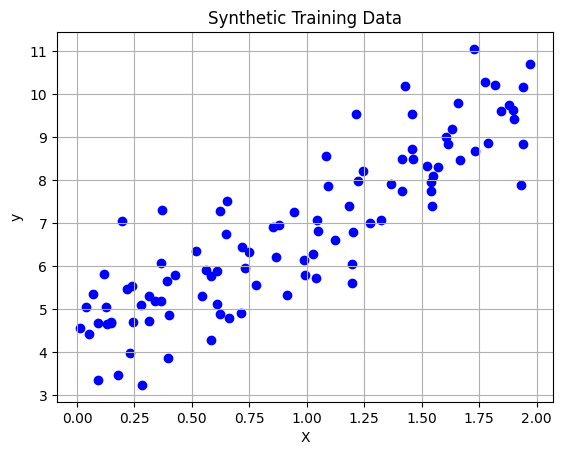

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)
y = y.reshape(-1, 1)

# Visualize data
plt.scatter(X, y, color='blue')
plt.title("Synthetic Training Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 4. Linear Regression Class Implementation

### Step-by-Step Implementation

We'll now implement a class for linear regression using gradient descent:

In [2]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iters):
            # Predict
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute and store loss
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## 5. Model Training

In [3]:
# Reshape X
X_train = X.reshape(-1, 1)

# Train model
model = LinearRegressionScratch(learning_rate=0.1, n_iters=1000)
model.fit(X_train, y)

# Make predictions
y_pred = model.predict(X_train)

## 6. Visualize Line of Best Fit

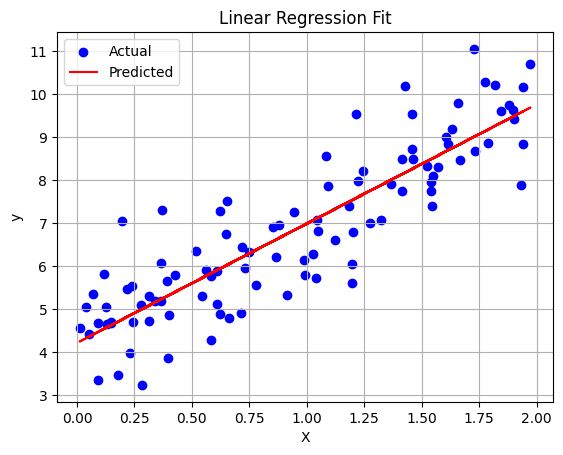

In [4]:
plt.scatter(X_train, y, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', label='Predicted')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


##  7. Visualize Training Loss

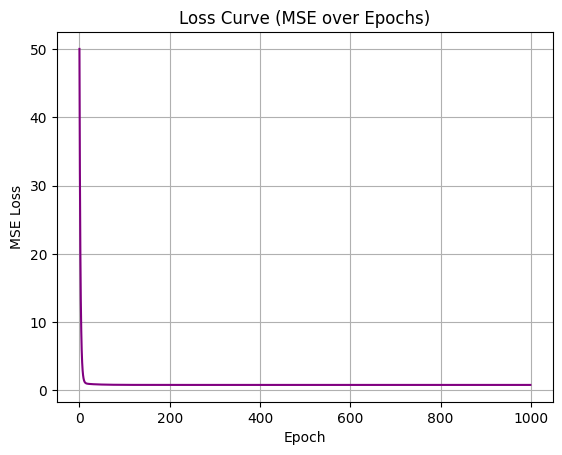

In [5]:
plt.plot(range(len(model.loss_history)), model.loss_history, color='purple')
plt.title("Loss Curve (MSE over Epochs)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


## 8. Print Final Parameters

In [6]:
print("Learned weights (slope):", model.weights.flatten()[0])
print("Learned bias (intercept):", model.bias)


Learned weights (slope): 2.77011341877136
Learned bias (intercept): 4.21509612092742


##  9. Evaluation Metric (R² Score)

### R² Score: Model Performance

The **R² Score** tells us how well our model explains the variance in the data.

$$
R^2 = 1 - \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}
$$


In [7]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("R² Score:", r2_score(y, y_pred))

R² Score: 0.7692735413614221


## Summary

- We implemented Linear Regression from scratch using gradient descent.
- Visualized predictions and loss over time.
- Measured performance using R² Score.

This is the foundation for more complex models like logistic regression and neural networks.


## Optional: Save Model Weights

In [8]:
np.save("weights.npy", model.weights)
np.save("bias.npy", model.bias)